# ETL

In [5]:
# The code was removed by Watson Studio for sharing.

In [6]:
df = pd.read_csv(streaming_body_1)
df.head()

,Unnamed: 0,area,peri,shape,perm
0,1,4990,2791.90,0.090330,6.3
1,2,7002,3892.60,0.148622,6.3
2,3,7558,3930.66,0.183312,6.3
3,4,7352,3869.32,0.117063,6.3
4,5,7943,3948.54,0.122417,17.1


In [8]:
df = pd.DataFrame(df, columns=['area','peri','shape','perm'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


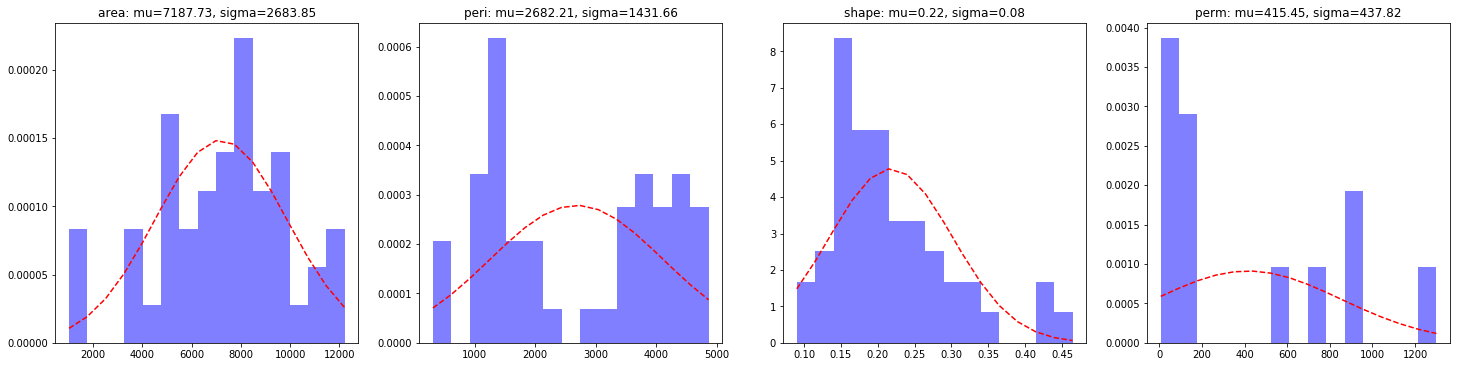

In [9]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(1, len(df.columns)+1):
    ax = fig.add_subplot(3, 4, i)

    mu = df[df.columns[i-1]].mean()
    sigma = df[df.columns[i-1]].std()
    ax.set_title(df.columns[i-1] + ': mu='+str('{0:.2f}'.format(mu))+', sigma=' + str('{0:.2f}'.format(sigma)), fontsize=12)

    num_bins = 15
    n, bins, patches = ax.hist(df[df.columns[i-1]], num_bins, normed=1, facecolor='blue', alpha=0.5)

    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    ax.plot(bins, y, 'r--')

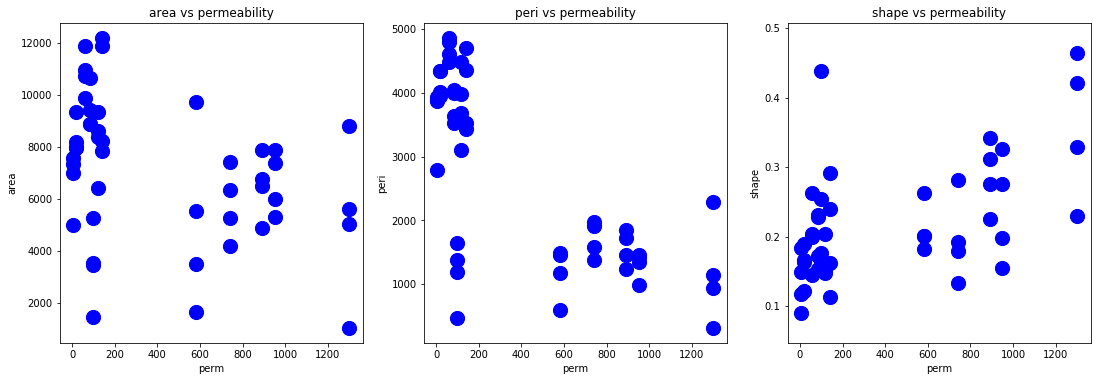

In [11]:
fig = plt.figure(figsize=(25,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in range(1, len(df.columns)):
    ax = fig.add_subplot(3, 4, i)
    ax.set_title(df.columns[i-1] + ' vs permeability', fontsize=12)
    ax.set_xlabel('perm')
    ax.set_ylabel(df.columns[i-1])    
    ax.scatter(df['perm'], df[df.columns[i-1]], facecolor='blue', s=200)